# Plot top k predictions, given query node and query relation

## Load libraries

In [547]:
library(data.table)
library(ggplot2)
library(purrr)
library(patchwork)
library(dplyr) 
library(ggbeeswarm)


## Functions

In [ ]:

get_pred_w_groundtruth <- function(x){
    myindex = x
    test_index = test[t%in%x]
    df = pred[short_x%in%x]
    test_index[,Treatment:="known"]
    df_known = merge(df, test_index[,.(h, r, t, Treatment)], by.x=c("short_y", "query_relation", "short_x"), 
        by.y=c("h", "r", "t"), all.x=TRUE)
    df_known[is.na(Treatment), Treatment:="unknown"]
    df_known = df_known[order(-probability)]
    df_known[, id := seq_len(.N), by=query_relation][order(query_relation, -probability)]
    return(df_known)
}

base_plot <- function(plt_data, k=10){
    plt_data$Treatment <- factor(plt_data$Treatment, levels=c("known", "unknown"))
    plt_data = plt_data[1:k][order(probability)]
    rel = unique(plt_data$query_relation)
    plt_data$long_y <- factor(plt_data$long_y, levels=plt_data$long_y)
    p1 <- ggplot(plt_data, aes(x=long_y, y=probability)) + 
    scale_fill_manual(values=c("#E69F00", "#56B4E9"), name="Treatment") +
    geom_bar(stat="identity", aes(fill=Treatment), width=0.7) + theme_bw() + 
    geom_hline(yintercept=0.5, linetype="dashed", color = "red") +
    labs(x="Drugs", y="Probability", title=paste0(rel)) +
    guides(color = "none")+
    theme(legend.position="right") +
    theme(text = element_text(size=15))+
    #theme(axis.text.x = element_text(angle = 90, vjust = 0, hjust=1), x)+ 
    coord_flip()
    return(p1)
}

plot_topk <- function(df, k=20){
    df_indi = df[query_relation=="indication"]
    df_contra = df[query_relation=="contraindication"]
    p1 = base_plot(df_contra, k) + theme(legend.position="none") 
    p2 = base_plot(df_indi, k) +  theme(legend.position="right")
    dis = unique(df_indi$long_x)
    idx = unique(df_indi$short_x)
    print(dis)
    return(p1+p2+plot_annotation(caption = '', theme=theme(plot.title=element_text(hjust=0.5,size=25))))
}

plot_topk_of_x <- function(x, k=20){
    df = get_pred_w_groundtruth(x)
    plt = plot_topk(df, k)
    return(plt)
}

sigmoid = function(x) {
   1 / (1 + exp(-x))
}

## Read in data

In [ ]:
pred = fread("results/primekg/cell_proliferation_42/predictions.csv", sep="\t")
pred$probability  <- sigmoid(pred$probability)
pred = pred[!(query_relation == "off-label use")]

test = fread("data/primekg/cell_proliferation_42/test.txt", sep="\t", col.names=c('h', 'r', 't'))
entities = fread("data/primekg/cell_proliferation_42/entity_all_info.txt", sep="\t")

## Plot top k predictions

[1] "acute lymphoblastic leukemia (disease)"


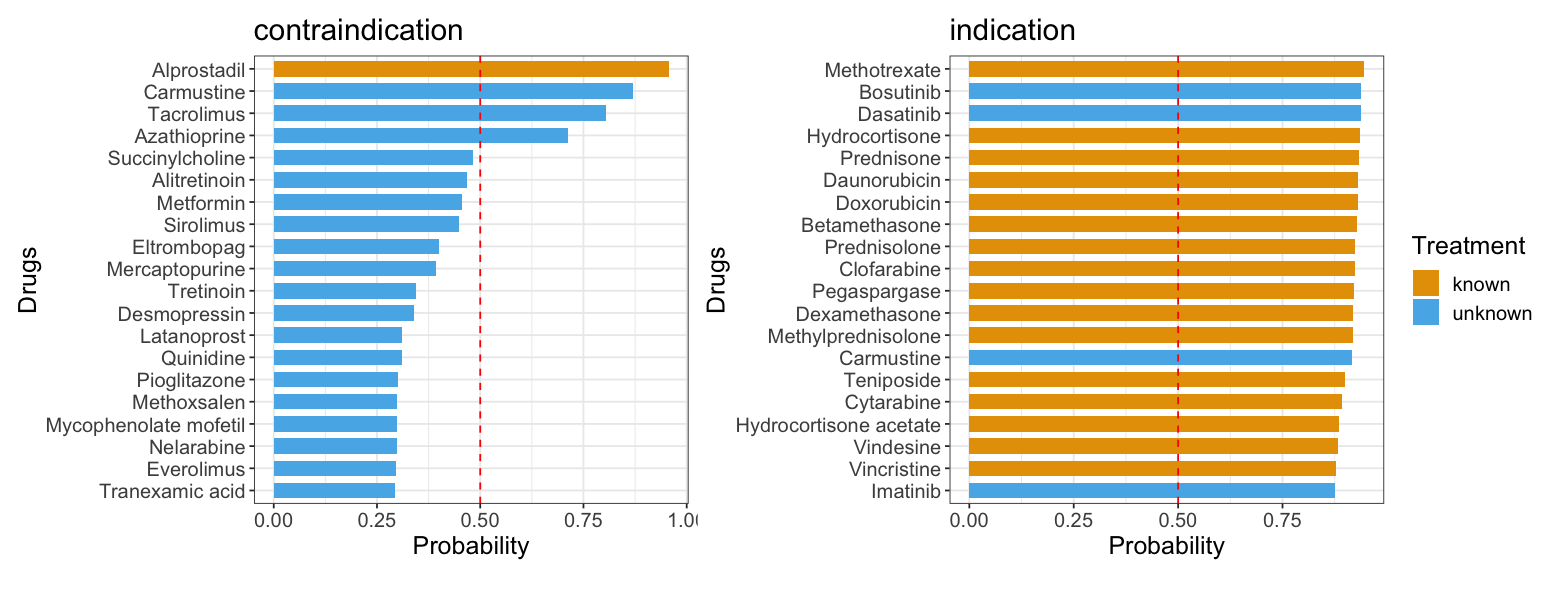

In [120]:
options(repr.plot.width = 13, repr.plot.height = 5)
plot_topk_of_x(33621, k=20)

[1] "primary central nervous system lymphoma"


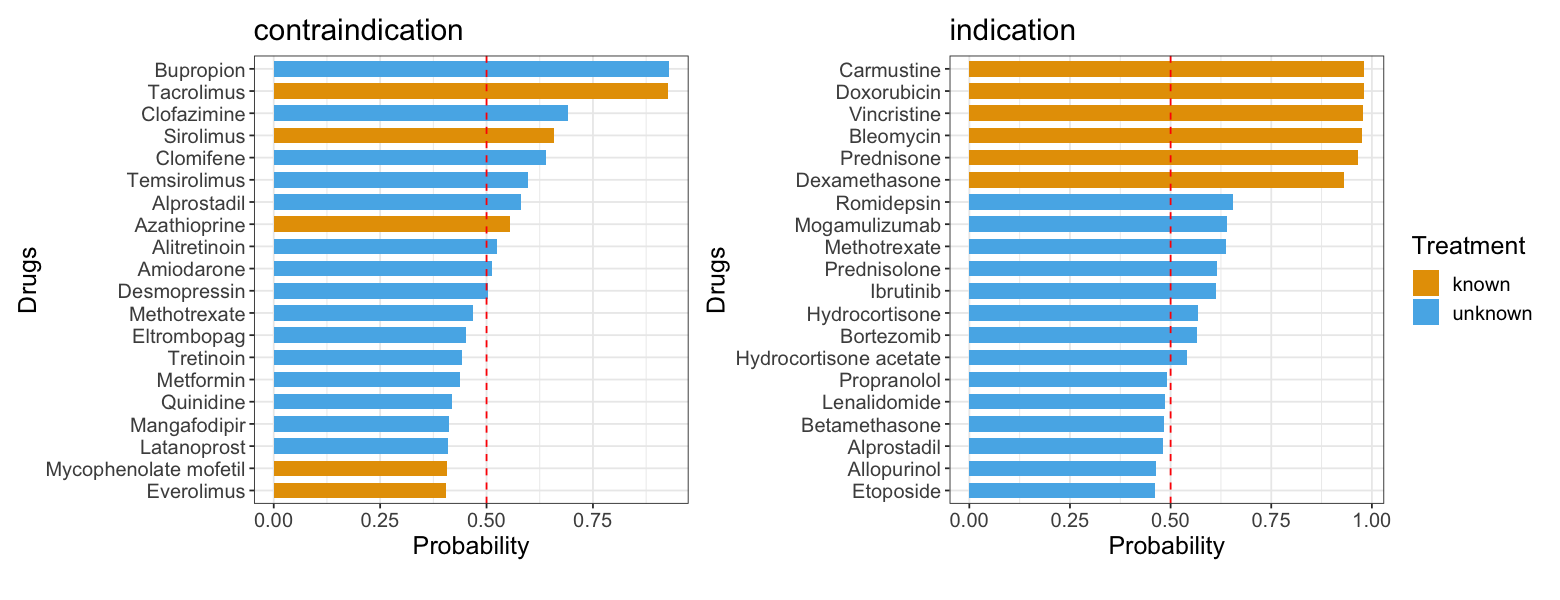

In [748]:
options(repr.plot.width = 13, repr.plot.height = 5)
plot_topk_of_x(36425, k=20)